In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

from utils.utils import find_nearest

In [2]:
reference_voltage = 3.3
max_output_current = 25e-3
steps = 2**12

In [3]:
steps

4096

In [4]:
step = reference_voltage / steps

In [5]:
step

0.0008056640625

In [8]:
codes = [i for i in range(steps)]
voltages = [(code / steps) * reference_voltage + step for code in codes]
df_mcp_4725 = pd.DataFrame({"code": codes, "value": voltages})

In [9]:
df_mcp_4725

,code,value
0,0,0.000806
1,1,0.001611
2,2,0.002417
3,3,0.003223
4,4,0.004028
...,...,...
4091,4091,3.296777
4092,4092,3.297583
4093,4093,3.298389
4094,4094,3.299194


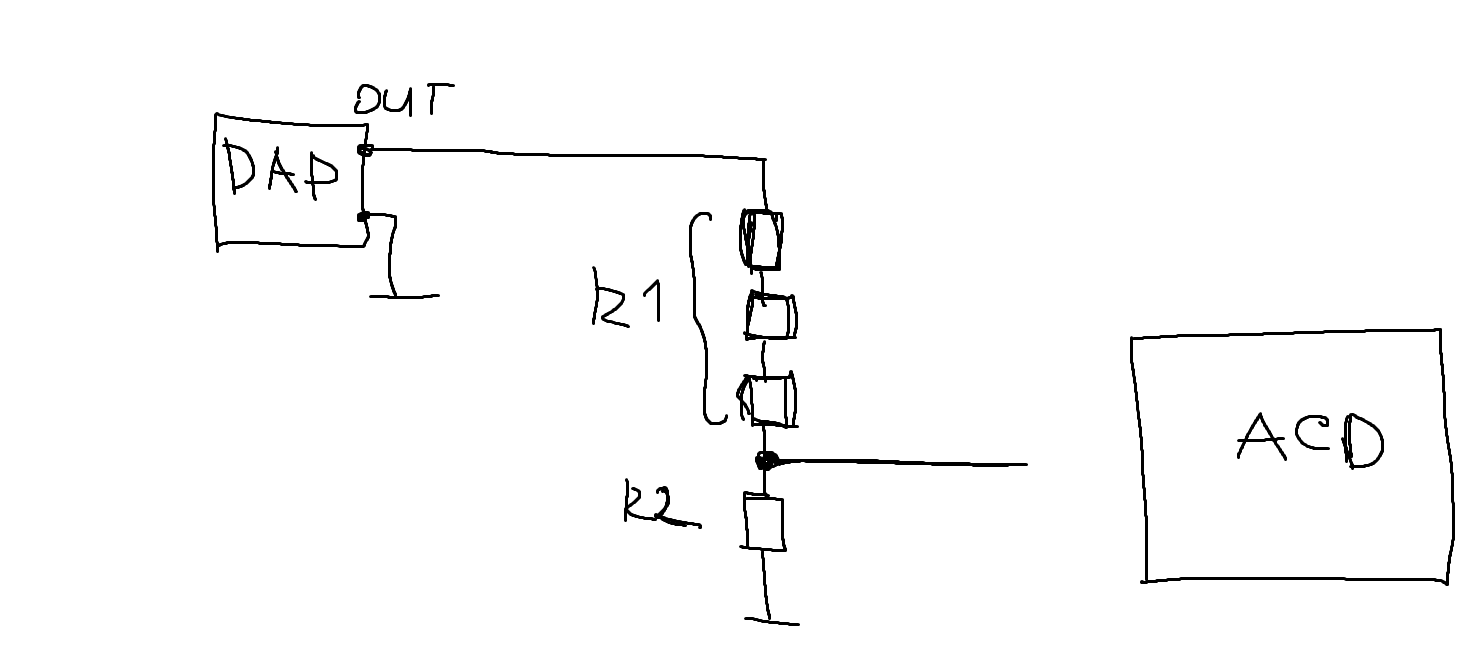

In [8]:
Image(filename="../../data/images/design.png")

In [9]:
R1 = 9900

In [10]:
R2 = 100

In [11]:
divider_coeff = R2 / (R1 + R2)

In [12]:
divider_coeff

0.01

In [13]:
df_mcp_4725["divided_voltage"] = df_mcp_4725["voltage"] * divider_coeff

In [35]:
df_mcp_4725.to_csv("../../data/DAC/mcp4725.csv", index=False)

In [15]:
divider_current = reference_voltage / (R1 + R2)

In [16]:
divider_current < max_output_current

True

In [17]:
def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val 

In [18]:
max_voltage = 40e-3
min_voltage = -1*max_voltage

In [19]:
step = ((max_voltage * 2) / 2**24)

In [20]:
step

4.76837158203125e-09

In [21]:
hx_codes = [i for i in range(2**24)]

In [22]:
twos_comp_codes = [twos_comp(i, 24) for i in hx_codes]

In [23]:
hx_voltages = [i * step for i in twos_comp_codes]

In [24]:
hex_codes = [hex(i).upper() for i in hx_codes]

In [25]:
df_hx = pd.DataFrame(
    {
        "code": hx_codes,
        "voltage": hx_voltages,
        "2's comp": twos_comp_codes,
        "hex_code": hex_codes,
    }
)

In [26]:
del twos_comp_codes
del hx_codes
del hx_voltages
del hex_codes

In [27]:
df_hx

,code,voltage,2's comp,hex_code
0,0,0.000000e+00,0,0X0
1,1,4.768372e-09,1,0X1
2,2,9.536743e-09,2,0X2
3,3,1.430511e-08,3,0X3
4,4,1.907349e-08,4,0X4
...,...,...,...,...
16777211,16777211,-2.384186e-08,-5,0XFFFFFB
16777212,16777212,-1.907349e-08,-4,0XFFFFFC
16777213,16777213,-1.430511e-08,-3,0XFFFFFD
16777214,16777214,-9.536743e-09,-2,0XFFFFFE


In [28]:
df_hx[df_hx["2\'s comp"]  == -4498]

,code,voltage,2's comp,hex_code
16772718,16772718,-0.000021,-4498,0XFFEE6E


In [29]:
-3914

-3914

In [30]:
-5206 / 0.0236

-220593.22033898305

In [31]:
5332 / 220593

0.024171211235170655

In [32]:
0.1 / 2**10

9.765625e-05